# Методы оптимизации нулевого порядка

## Функция $f(x) = x^4 + 8x^3 - 6x^2 - 72x + 90$ на отрезке $[1.5; 2], \varepsilon = 0.05$

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return x**4 + 8*(x**3) - 6*(x**2) - 72*x + 90

In [3]:
a, b, eps = 1.5, 2, 0.05

In [4]:
def plot_f(a = a, b = b, color = 'blue'):
    x = np.linspace(a, b, 100)
    y = list(map(f, x))
    plt.plot(x, y, color)

### Метод пассивного поиска

In [5]:
def passive_search(f = f, a = a, b = b, eps = eps):
    
    n = round((b-a)/eps)+1
    x_s = [a+i*eps for i in range(n)]
    y_s = [f(i) for i in x_s]
    res = y_s.index(min(y_s))
    
    plot_f()
    plt.scatter(x_s, y_s)
    plt.scatter(x_s[res], y_s[res], color = 'red')
    
    df = pd.DataFrame(data=[x_s, y_s],index = ['x', 'y'])
    print(df.head())
    
    print("\nТочка с координатами x = {}, y = {}".format(x_s[res], y_s[res]))
    
    print("\nЗначение функции считалось {} раз".format(n))

       0         1       2         3       4         5       6         7   \
x  1.5000  1.550000  1.6000  1.650000  1.7000  1.750000  1.8000  1.850000   
y  0.5625 -0.451994 -1.2384 -1.785994 -2.0839 -2.121094 -1.8864 -1.368494   

       8         9    10  
x  1.9000  1.950000  2.0  
y -0.5559  0.563006  2.0  

Точка с координатами x = 1.75, y = -2.12109375

Значение функции считалось 11 раз


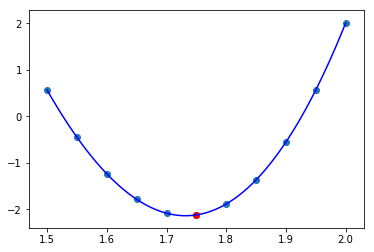

In [6]:
passive_search()

### Метод дихотомии

In [7]:
def dichotomy(f = f, a = a, b = b, eps = eps, delta = 0.001):
    
    n = round(math.log( (b-a-delta)/(eps-(delta/2)), 2))+1
    a_i, b_i = a, b
    plot_f()
    for i in range(n):
        c = (a_i+b_i-delta)/2
        d = (a_i+b_i+delta)/2
        
        if f(c) <= f(d):
            b_i = d
        else:
            a_i = c
        plt.figure()
        plot_f(a, a_i)
        plot_f(a_i, b_i, 'red')
        plot_f(b, b_i)
    
    res = (a_i+b_i)/2
    plt.scatter(res, f(res), color = 'blue')
    print("Точка с координатами x = {}, y = {}".format(res, f(res)))
    
    print("\nЗначение функции считалось {} раз".format(2*(n)))

Точка с координатами x = 1.73440625, y = -2.1381413603191533

Значение функции считалось 8 раз


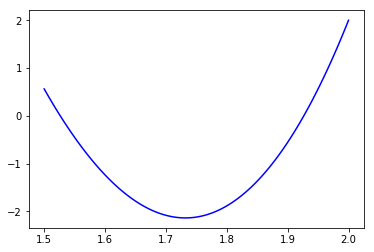

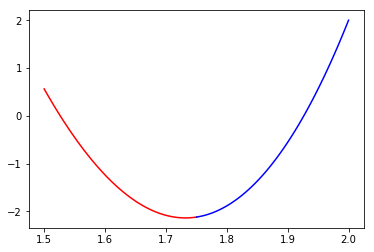

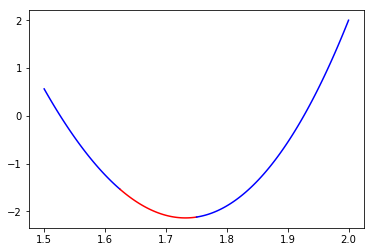

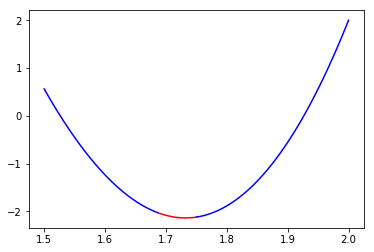

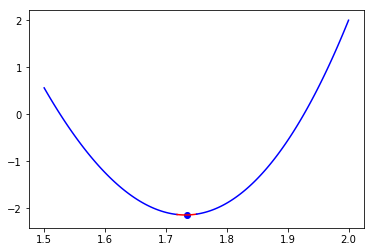

In [8]:
dichotomy()

### Метод золотого сечения

In [9]:
def golden_section(f = f, a = a, b = b, eps = eps):
    a_i, b_i = a, b
    points=[None, None]
    funcs=[None, None]
    c = a_i + (b_i-a_i)*((3-math.sqrt(5))/2)
    d = a_i + (b_i-a_i)*((math.sqrt(5)-1)/2)
    f_c = f(c)
    f_d = f(d)
    if f_c <= f_d:
        b_i = d
        point = 1
        points[point] = c
        funcs[point] = f_c
    else:
        a_i = c
        point = 0
        points[point] = d
        funcs[point] = f_d
    
    n=0
    while (b_i - a_i)>eps*2:
        points = [ a_i + (b_i-a_i)*((3-math.sqrt(5))/2),
                   a_i + (b_i-a_i)*((math.sqrt(5)-1)/2)]
        p = points[1-point]
        funcs[1-point] = f(p)
        n+=1
        if funcs[0] <= funcs[1]:
            point = 1
            b_i = points[point]
        else:
            point = 0
            a_i = points[point]
    
        plt.figure()
        plot_f(a, a_i)
        plot_f(a_i, b_i, 'red')
        plot_f(b, b_i)
    
    res = (a_i+b_i)/2
    plt.scatter(res, f(res), color = 'blue')
    print("Точка с координатами x = {}, y = {}".format(res, f(res)))
    print("\nЗначение функции считалось {} раз".format(2+n))

Точка с координатами x = 1.7725424859373686, y = -2.0496141965016363

Значение функции считалось 5 раз


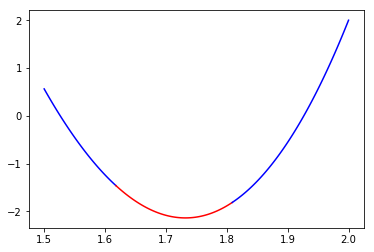

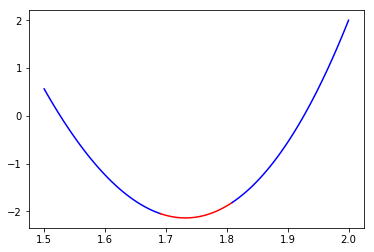

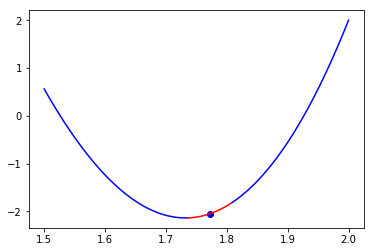

In [10]:
golden_section()